# Семинар 3.3 - Проблема собственных значений

Семинар посвящён методам нахождения собственных чисел ну и всякому такому.

## План

- Степенной метод
    - Наивный подход
    - Круги Гершгорина
    - Степенной метод
    - Анализ сходимости для эрмитовой матрицы
    - Советы по применению
    - Треугольные матрицы
    - Теорема Шура
    - Нормальные матрицы
    - Псевдоспектр
- QR-алгоритм
    - Теория
    - Реализация
    - Ускорение QR-алгоритма
- QR со сдвигами, степенной метод, итерации Рэлея и обратные итерации, SVD
- Метод "разделяй и властвуй"
- Метод бисекции
- Метод Якоби
- Выводы по способам вычисления разложений

    
  

# Степенной метод

- Часто в вычислительной практике требуется найти не весь спектр, а только некоторую его часть, например самое большое или самое маленькое собственые значения.
- Также отметим, что для Эрмитовых матриц $\left(A=A^*\right)$ собственные значения всегда действительны (докажите!).
- Степенной метод - простейший метод вычисления максимального по модулю собственного значения. 

## Наивный способ вычисления собственных чисел.

Характеристическое уравнение можно использовать для вычисления собственных значений, что приводит нас к наивному алгоритму:

$$
p(\lambda)=\operatorname{det}(A-\lambda I)
$$

1. Вычислить коэффициенты многочлена
2. Найти его корни
Это хорошая идея?
Посмотрим на небольшой пример

Text(0, 0.5, 'Imaginary part')

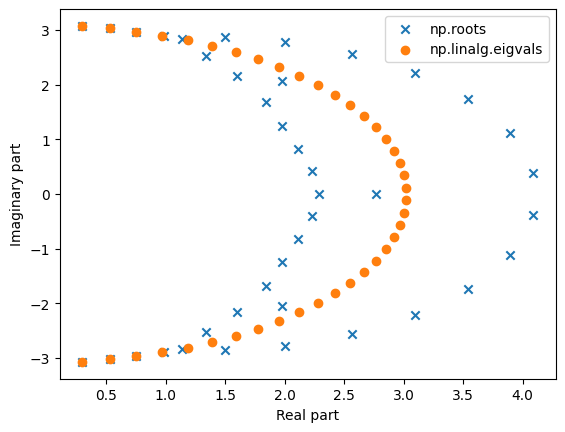

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n = 40
a = [[1.0 / (i - j + 0.5) for i in range(n)] for j in range(n)]
a = np.array(a)
ev = np.linalg.eigvals(a)
#There is a special numpy function for chacteristic polynomial
cf = np.poly(a)
ev_roots = np.roots(cf)
#print('Coefficients of the polynomial:', cf)
#print('Polynomial roots:', ev_roots)
plt.scatter(ev_roots.real, ev_roots.imag, marker='x', label='np.roots')
b = a + 0.01 * np.random.randn(n, n)
ev_b = np.linalg.eigvals(b)
plt.scatter(ev.real, ev.imag, marker='o', label='np.linalg.eigvals')
#plt.scatter(ev_b.real, ev_b.imag, marker='o', label='Малое возмущение')
plt.legend(loc='best')
plt.xlabel('Real part')
plt.ylabel('Imaginary part') 

Мораль:
- Не делайте так, если только у вас нет серьёзной причины
- Поиск корней полинома - очень плохо обусловленная задача (задача может быть обусловлена не так плохо, но с использованием другого базиса в пространстве многочленов). Заметим, что матрицей Грама для мономов

$$
h_{i j}=\int_{0}^{1} x^{i} x^{j} d x=\frac{1}{i+j+1}
$$

является матрица Гильберта, у которой сингулярные числа экспоненциально убывают. Таким образом, мономы почти линейно зависимы.

### Круги Гершгорина


- Есть интересная теорема, которая часто помогает локализовать собственные значения матрицы $A = (a_{ij})$.
- Она называется теоремой Гершгорина.
- Она утверждает, что все собственные значения $\lambda_i, i=1, \ldots, n$ находятся внутри объединения кругов Гершгорина $C_i$, где $C_i$ - окружность на комплексной плоскости с центром в $a_{i i}$ и радиусом

$$
r_i=\sum_{j \neq i}\left|a_{i j}\right|
$$

Более того, если круги не пересекаются, то они содержат по одному собственному значению внутри каждого круга.

**Доказательство.**


Сначала покажем, что если матрица $A$ обладает строгим диагональным преобладанием, то есть

$$
\left|a_{i i}\right|>\sum_{j \neq i}\left|a_{i j}\right|,
$$

тогда такая матрица невырождена.
Разделим диагональную и недиагональную часть и получим

$$
A=D+S=D\left(I+D^{-1} S\right)
$$

где $\left\|D^{-1} S\right\|_1<1$. Поэтому, в силу теоремы о ряде Неймана, матрица $I+D^{-1} S$ обратима и, следовательно, $A$ также обратима. $\Large \blacksquare$

Теперь докажем утверждение теоремы от противного:
- если любое из собственных чисел лежит вне всех кругов, то матрица $(A-\lambda I)$ обладает свойством строгого диагонального преобладания
- поэтому она обратима
- это означает, что если $(A-\lambda I) x=0$, то $x=0$. 

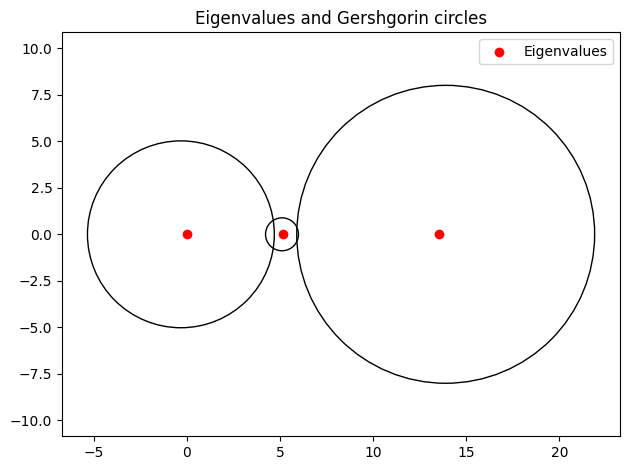

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
n = 3
fig, ax = plt.subplots(1, 1)
a = [[5, 1, 1], [1, 0, 0.5], [2, 0, 10]]
#a = [[1.0 / (i - j + 0.5) for i in xrange(n)] for j in xrange(n)]
a = np.array(a)
#a = np.diag(np.arange(n))
a = a + 2 * np.random.randn(n, n)
#u = np.random.randn(n, n)
#a = np.linalg.inv(u).dot(a).dot(u)
xg = np.diag(a).real
yg = np.diag(a).imag
rg = np.zeros(n)
ev = np.linalg.eigvals(a)
for i in range(n):
    rg[i] = np.sum(np.abs(a[i, :])) - np.abs(a[i, i])
    crc = plt.Circle((xg[i], yg[i]), radius=rg[i], fill=False)
    ax.add_patch(crc)
plt.scatter(ev.real, ev.imag, color='r', label="Eigenvalues")
plt.axis('equal')
plt.legend()
ax.set_title('Eigenvalues and Gershgorin circles')
fig.tight_layout()

Замечание: Существуют более сложные фигуры, под названием овалы Cassini, которые содержат спектр


$$
M_{i j}=\left\{z \in \mathbb{C}:\left|a_{i i}-z\right| \cdot\left|a_{j j}-z\right| \leq r_{i} r_{j}\right\}, \quad r_{i}=\sum_{l \neq i}\left|a_{i l}\right|
$$  

https://en.wikipedia.org/wiki/Cassini_oval  

## Детали метода

Задача на собственые значения

$$
A x=\lambda x, \quad\|x\|_2=1 \text { для устойчивости. }
$$

может быть записана как итерации с неподвижной точкой, которые называются степенным методом и дают максимальное по модулю собственное значение матрицы $A$.

Степенной метод имеет вид

$$
x_{k+1}=A x_k, \quad x_{k+1}:=\frac{x_{k+1}}{\left\|x_{k+1}\right\|_2} .
$$

и $x_{k+1} \rightarrow v_1$, где $A v_1=\lambda_1 v_1$ и $\lambda_1$ максимальное по модулю собственное значение, и $v_1-$ соответствующий собственный вектор.
На $(k+1)$-ой итерации приближение для $\lambda_1$ может быть найдено следующим образом

$$
\lambda^{(k+1)}=\left(A x_{k+1}, x_{k+1}\right),
$$

Заметим, что $\lambda^{(k+1)}$ не требуется для $(k+2)$-ой итерации, но может быть полезно для оценки ошибки на каждой итерации: $\left\|A x_{k+1}-\lambda^{(k+1)} x_{k+1}\right\|$.

Метод сходится со скоростью геометричекой прогрессии, с константой $q=\left|\frac{\lambda_2}{\lambda_1}\right|<1$, где $\lambda_1>\lambda_2 \geq \cdots \geq \lambda_n$. Это означает, что сходимость может быть сколь угодно медленной при близких значениях у $\lambda_1$ и $\lambda_2$. 

## Анализ сходимости для эрмитовой матрицы

- Рассмотрим степенной метод более подробно для случая эрмитовой матрицы
- Через несколько слайдов вы увидите, что любая эрмитова матрица диагонализуема, поэтому существует ортонормированный базис из собственных векторов $v_1, \ldots, v_n$ такой что $A v_i=\lambda_i v_i$.
- Разложим $x_0$ в этом базисе с коэффициентами $c_i$:

$$
x_0=c_1 v_1+\cdots+c_n v_n .
$$

- Поскольку $v_i$ - собственные векторы, выполнены следующие равенства

$$
\begin{aligned}
x_1 &=\frac{A x_0}{\left\|A x_0\right\|}=\frac{c_1 \lambda_1 v_1+\cdots+c_n \lambda_n v_n}{\left\|c_1 \lambda_1 v_1+\cdots+c_n \lambda_n v_n\right\|} \\
& \vdots \\
x_k &=\frac{A x_{k-1}}{\left\|A x_{k-1}\right\|}=\frac{c_1 \lambda_1^k v_1+\cdots+c_n \lambda_n^k v_n}{\left\|c_1 \lambda_1^k v_1+\cdots+c_n \lambda_n^k v_n\right\|}
\end{aligned}
$$

- Получаем следующее выражение

$$
x_k=\frac{c_1}{\left|c_1\right|}\left(\frac{\lambda_1}{\left|\lambda_1\right|}\right)^k \frac{v_1+\frac{c_2}{c_1} \frac{\lambda_2^k}{\lambda_1^k} v_2+\cdots+\frac{c_n}{c_1} \frac{\lambda_n^k}{\lambda_1^k} v_n}{\left\|v_1+\frac{c_2}{c_1} \frac{\lambda_2^k}{\lambda_1^k} v_2+\cdots+\frac{c_n}{c_1} \frac{\lambda_n^k}{\lambda_1^k} v_n\right\|}
$$

которое сходится к $v_1$ при $\left|\frac{c_1}{\left|c_1\right|}\left(\frac{\lambda_1}{\left|\lambda_1\right|}\right)^k\right|=1$ и $\left(\frac{\lambda_2}{\lambda_1}\right)^k \rightarrow 0$ если $\left|\lambda_2\right|<\left|\lambda_1\right|$.


## Что необходимо помнить про степенной метод.

- Степенной метод даёт оценку для максимального по модулю собственного числа или спектрального радиуса матрицы
- Одна итерация требует одного умножения матрицы на вектор. Если можно умножить вектор на матрицу за $\mathcal{O}(n)$ (напрмиер, она разреженная), тогда степенной метод можно использовать для больших $n$
- Сходимость может быть медленной
- Для грубой оценки максимального по модулю собственного значения и соответствующего вектора достаточно небольшого числа итераций
- Вектор решения лежит в Крыловском подпространстве $\left\{x_0, A x_0, \ldots, A^k x_0\right\}$ и имеет вид $\mu A^k x_0$, где $\mu$ нормировочная постоянная.

## Для какой матрицы легко найти весь спектр?

Существует класс матриц, для которого собственные числа можно найти очень легко, - это треугольные матрицы

$$
A=\left(\begin{array}{ccc}
\lambda_1 & * & * \\
0 & \lambda_2 & * \\
0 & 0 & \lambda_3
\end{array}\right)
$$

Собственные числа матрицы $A-\lambda_1, \lambda_2, \lambda_3$. Почему?
Потому что детерминант имеет вид

$$
\operatorname{det}(A-\lambda I)=\left(\lambda-\lambda_1\right)\left(\lambda-\lambda_2\right)\left(\lambda-\lambda_3\right) .
$$

Таким образом, вычисление собственных значений для треугольной матрицы - простая задача. Теперь на помощь приходят унитарные матрицы. Пусть $U$ унитарная матрица, то есть $U^* U=I$. Тогда выполнены следующие равенства

$$
\operatorname{det}(A-\lambda I)=\operatorname{det}\left(U\left(U^* A U-\lambda I\right) U^*\right)=\operatorname{det}\left(U U^*\right) \operatorname{det}\left(U^* A U-\lambda I\right)=\operatorname{det}\left(U^* A U-\lambda I\right),
$$

где мы используем свойства детерминанта от произведения матриц, $\operatorname{det}(A B)=\operatorname{det}(A) \operatorname{det}(B)$. Это означает, что матрицы $U^* A U$ и $A$ имеют одинаковые характеристические многочлены, и, следовательно, одинаковые собственные значения.
Если мы приведём матрицу $A$ к верхнетреугольному виду $T$ с помощью унитарной матрицы $U: U^* A U=T$, мы решили задачу! Умножим слева и справа на $U$ и $U^*$ соответственно, получим нужное нам разложение:

$$
A=U T U^* .
$$

- Это знаменитое разложение Шура.
- Напомним, что использование унитарных матриц приводит к устойчивым алгоритмам, таким образом обственные значения вычисляются очень точно.
- Разложение Шура показывает, почему нам нужны матричные разложения: они представляют матрицу в виде произведения трёх матриц подходящей структуры.

## Теорема Шура.

Теорема: Каждая матрица $A \in \mathbb{C}^{n \times n}$ может быть представлена в виде формы Шура $A=U T U^*$, где $U$ унитарная, а $T$ верхнетреугольная.
Набросок доказательства.
1. Каждая матрица имеет как минимум один ненулевой собственный вектор (для корня характеристического многочлена матрица $(A-\lambda I)$ вырождена и имеет нетривиальное ядро). Пусть

$$
A v_1=\lambda_1 v_1, \quad\left\|v_1\right\|_2=1
$$

2. Пусть $U_1=\left[v_1, v_2, \ldots, v_n\right]$, где $v_2, \ldots, v_n$ любые векторы ортогональные $v_1$. Тогда

$$
U_1^* A U_1=\left(\begin{array}{cc}
\lambda_1 & * \\
0 & A_2
\end{array}\right)
$$

где $A_2$ матрица размера $(n-1) \times(n-1)$. Это называется блочнотреугольной формой. Теперь мы можем проделать аналогичную процедуру для матрицы $A_2$ и так далее.

Замечание: Поскольку в доказательстве необходимы собственные векторы, оно не является практичным алгоритмом.

## Нормальные матрицы.

Важное приложение теоремы Шура связано с так называемыми нормальными матрицами.
Определение. Матрица $A$ называется нормальной матрицей, если

$$
A A^*=A^* A .
$$

Q: Какие примеры нормальных матриц вы можете привести?

Примеры: эрмитовы матрицы, унитарные матрицы.

**Нормальные матрицы**


Tеорема: $A$ - нормальная матрица, тогда и только тогда, когда $A=U \Lambda U^*$, где $U$ унитарна и $\Lambda$ диагональна.

Набросок доказательства: 

В одну сторону доказательство очевидно (если разложение существует, необходимо проверить выполнение определения нормальной матрицы).

В другую сторону доказательство более сложное. Рассмотрим форму Шура для матрицы $A$. Тогда $A A^*=A^* A$ означает, что $T T^*=T^* T$.

Сравнив поэлементно матрицы в левой и правой части, сразу становится видно, что единственная верхнетреугольная матрица, для которой такое равенство будет выполнено - это диагональная матрица!

**Важное следствие**

Любая нормальная матрица - унитарно диагонализуема. Это означает, что она может быть приведена к диагональному виду с помощью унитарной матрицы U. Другими словами, каждая нормальная матрица имеет ортогональный базис из собственных векторов.

## Псевдоспектр.

Во многих задачах необходимо найти максимальный или минимальный собственный вектор и соответствующее ему значение. Для этого используют вариационный принцип.

- Тогда, если $А$ эрмитова матрица, отношение Релея определяется как

$$
R_{A}(x)=\frac{(A x, x)}{(x, x)}
$$

и максимальное собственное значение равно максимальному значению $R_{A}(x)$, аналогично для минимального собственного значения.
- Таким образом, мы можем использовать методы оптимизации для поиска этих экстремальных собственных значений.


А теперь приведём понятие, которое является обобщением собственных чисел


- Для динамических систем с матрицей $А$, спектр может много сообщить о поведении системы (например, о её устойчивости)
- Однако для не нормальных матриц, спектр может быть неустойчивым относительно малых возмущений матрицы
- Для измерения подобных возмущений было разработана концепция псевдоспектра.

**Псевдоспектр.**

Рассмотрим объединение всех возможных собственных значений для всевозможных возмущений матрицы $ A .$

$$
\Lambda_{\epsilon}(A)=\left\{\lambda \in \mathbb{C}: \exists E, x \neq 0:(A+E) x=\lambda x, \quad\|E\|_{2} \leq \epsilon .\right\}
$$

Для малых $Е$ и нормальных $А$ это круги вокруг собственных значений. Для не нормальных матриц структура может сильно отличаться. Подробности можно найти тут: http://www.cs.ox.ac.uk/pseudospectra/

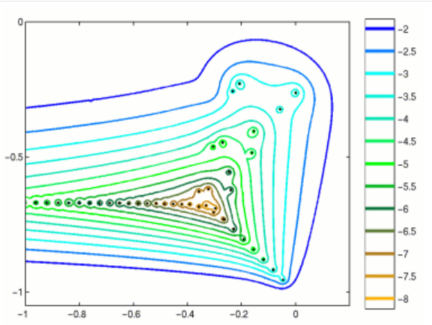 

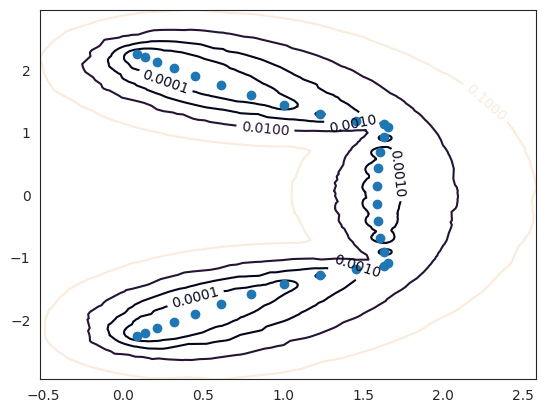

In [13]:
#!pip install pseudopy

#If you had the issue. I suggest changing line 62 of utils.py to
#pyplot.clabel(contours)
#This fixes the problem for me

#import pseudopy
#print(pseudopy.__file__)


from pseudopy import NonnormalAuto, demo
from scipy.linalg import eigvals

# get Grcar matrix
A = demo.grcar(32).todense()

# compute pseudospectrum for the levels of interest between [1e-5, 1]
pseudo = NonnormalAuto(A, 1e-5, 1, n_points=20)

# plot
pseudo.plot([10**k for k in range(-4, 0)], spectrum=eigvals(A))
plt.show()

## QR алгоритм

- QR алгоритм был предложен в 1961 г. независимо В. Н. Кублановской и Ј. Francis'ом. Статью про историю этого алгоритма и его авторов можно прочитать тут. https://www.atm.org.uk/write/MediaUploads/Resources/Mid_Plenary_FrancisGolub.pdf  

- Не путайте QR алгоритм и QR разложение!

- QR разложение - это представление матрицы в виде произведения двух матриц, а QR алгоритм использует QR разложение для вычисления разложения Шypa.

- Является "золотым стандартом" для вычисления собственных значений

### Теория

Рассмотрим выражение

$$
A=Q T Q^*
$$

и перепишем его в виде

$$
Q T=A Q
$$

Слева замечаем QR разложение матрицы $A Q$. 

Запишем следующий итерационный процесс

$$
Q_{k+1} R_{k+1}=A Q_k, \quad Q_{k+1}^* A=R_{k+1} Q_k^*
$$

Введём новую матрицу

$$
A_k=Q_k^* A Q_k=Q_k^* Q_{k+1} R_{k+1}=\widehat{Q}_k R_{k+1}
$$

тогда аппроксимация для $A_{k+1}$ имеет вид

$$
A_{k+1}=Q_{k+1}^* A Q_{k+1}=\left(Q_{k+1}^* A=R_{k+1} Q_k^*\right)=R_{k+1} \widehat{Q}_k .
$$


Итак, мы получили стандартную форму записи QR алгоритма.
Финальные формулы обычно записывают в QRRQ-форме:

1. Инициализируем $A_0=A$.
2. Вычислим QR разложение матрицы $A_k: A_k=Q_k R_k$.
3. Обновим аппроксимацию $A_{k+1}=R_k Q_k$.

Продолжаем итерации пока $A_k$ не станет достаточно треугольной (например, норма подматрицы под главной диагональю не станет достаточно мала). 

Утверждение
Матрицы $A_k$ унитарно подобны матрице $A$

$$
A_k=Q_{k-1}^* A_{k-1} Q_{k-1}=\left(Q_{k-1} \ldots Q_1\right)^* A\left(Q_{k-1} \ldots Q_1\right)
$$

а произведение унитарных матриц - унитарная матрица.
Сложность одной итерации $\mathcal{O}\left(n^3\right)$, если используется $\mathrm{QR}$ разложение для общего случая.
Мы ожидаем, что $A_k$ будет очень близка к треугольной матрице для достаточно большого $k$. 

In [14]:
import numpy as np
n = 4
a = [[1.0/(i + j + 0.5) for i in range(n)] for j in range(n)]
niters = 200
for k in range(niters):
    q, rmat = np.linalg.qr(a)
    a = rmat.dot(q)
print('Leading 3x3 block of a:')
display(a[:3, :3])

Leading 3x3 block of a:


array([[ 2.41052440e+000,  2.69817894e-018, -4.95361754e-017],
       [ 2.42500623e-168,  3.49984625e-001,  1.75163388e-017],
       [ 0.00000000e+000,  6.56745067e-273,  1.53236733e-002]])

### Реализация QR-алгоритма

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def qr_algorithm(A, num_iter, eps):
    T = A.copy()
    U = np.eye(A.shape[0])
    conv = [(T, U)]
    for i in range(num_iter):
        Q, R = np.linalg.qr(T)
        T = R @ Q
        U = U @ Q
        conv.append((T, U))
        if np.sum(np.abs(np.tril(T, k=-1))) < eps:
            break
    return T, U, conv[1:]

In [6]:
n = 7
A = np.random.randn(n, n)
# A = A.T @ A
A = A + A.T
true_eigvals, true_eigvec = np.linalg.eig(A)
print(true_eigvals)

[ 6.52997571  4.50141722 -3.73006326 -1.07362842  0.60342261 -0.10759557
  0.20154688]


In [7]:
T, U, conv = qr_algorithm(A, 2000, 1e-6)
print(np.linalg.norm(A - U @ T @ U.T))

3.3615305188435715e-14


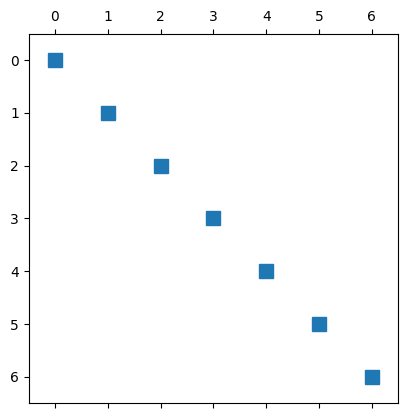

In [8]:
plt.spy(T, markersize=10, precision=1e-6)

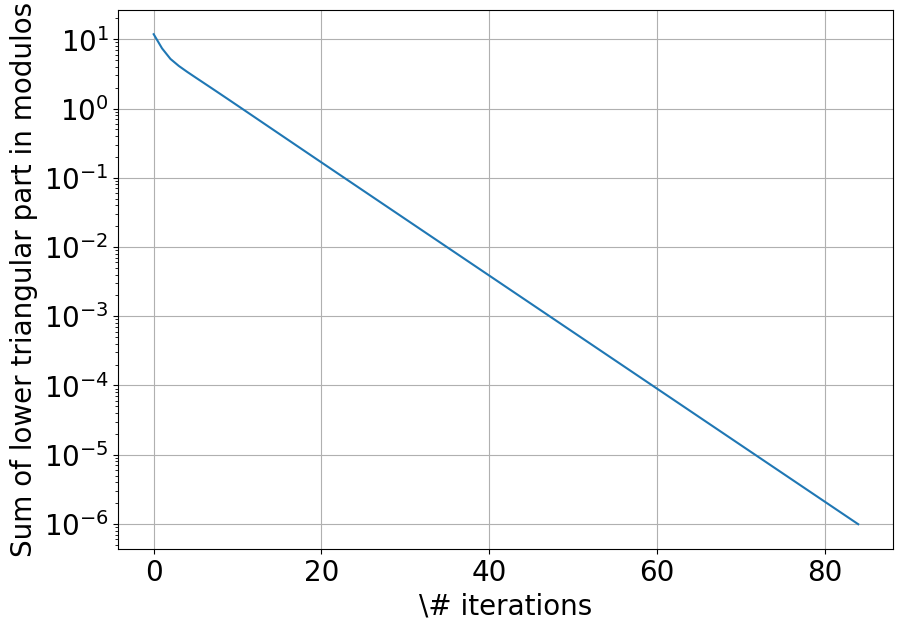

In [9]:
plt.figure(figsize=(10, 7))
conv_qr = np.array([np.sum(np.abs(np.tril(T, k=-1))) for T, U in conv])
plt.plot(conv_qr)
plt.yscale("log")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("\# iterations", fontsize=20)
plt.ylabel("Sum of lower triangular part in modulos", fontsize=20)
plt.grid(True)

In [10]:
U.round(4), true_eigvec.round(4)

(array([[-0.4886, -0.3316,  0.0074, -0.636 ,  0.3542,  0.2326, -0.2593],
        [-0.3539,  0.0721,  0.3319,  0.2324, -0.1494,  0.7006,  0.4385],
        [-0.375 , -0.1476, -0.537 ,  0.0802, -0.6988,  0.0476, -0.2285],
        [ 0.2339, -0.4113,  0.6706, -0.0782, -0.4536, -0.0164, -0.3381],
        [-0.2161,  0.8146,  0.2623, -0.3172, -0.2209, -0.1055, -0.2456],
        [ 0.3593, -0.0229, -0.1526, -0.6539, -0.3245,  0.0548,  0.5578],
        [ 0.5146,  0.1723, -0.2442, -0.0266,  0.0643,  0.6621, -0.4501]]),
 array([[ 0.4886,  0.3316,  0.0074,  0.636 ,  0.3542, -0.2593,  0.2326],
        [ 0.3539, -0.0721,  0.3319, -0.2324, -0.1494,  0.4385,  0.7006],
        [ 0.375 ,  0.1476, -0.537 , -0.0802, -0.6988, -0.2285,  0.0476],
        [-0.2339,  0.4113,  0.6706,  0.0782, -0.4536, -0.3381, -0.0164],
        [ 0.2161, -0.8146,  0.2623,  0.3172, -0.2209, -0.2456, -0.1055],
        [-0.3593,  0.0229, -0.1526,  0.6539, -0.3245,  0.5578,  0.0548],
        [-0.5146, -0.1723, -0.2442,  0.0266,  0.0

### Ускорение QR алгоритма

Матрица $A$ имеет верхне-гессенбергову форму, если $a_{i j}=0$, при $i \geq j+2$.

$$
H=\left[\begin{array}{lllll}
* & * & * & * & * \\
* & * & * & * & * \\
0 & * & * & * & * \\
0 & 0 & * & * & * \\
0 & 0 & 0 & * & *
\end{array}\right]
$$ 

С помощью отражений Хаусхолдера можно привести любую матрицу к верхне-гессенберговой форме:

$$
U^* A U=H .
$$

- Сложность такого приведения $\mathcal{O}\left(n^3\right)$ операций
- Если матрица приведена к верхне-гессенберговой форме, то одна итерация QR алгоритма имеет сложность $\mathcal{O}\left(n^2\right)$ операций (например, используя вращения Гивенса) (почему?)
- Также верхне-гессенбергова форма матрицы сохраняется после выполнения одной итерации QR алгоритма (проверим ниже).

Матрица Хаусхолдера - это матрица вида

$$
H \equiv H(v)=I-2 v v^*,
$$

где $v-n \times 1$ вектор и $v^* v=1$. Покажите, что $H$ унитарна и Эрмитова. Это также матрица отражения относительно плоскости с нормалью $v$:

$$
H x=x-2\left(v^* x\right) v
$$ 

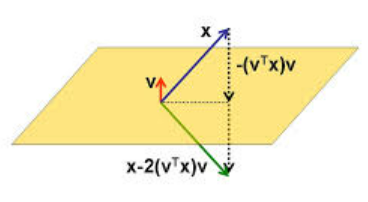 

### Свойства матрицы Хаусхолдера

Преобразование Хаусхолдера может занулить все элементы в столбце матрицы, кроме первого:

$$
H\left[\begin{array}{c}
\times \\
\times \\
\times \\
\times
\end{array}\right]=\left[\begin{array}{l}
\times \\
0 \\
0 \\
0
\end{array}\right]
$$  

Доказательство 

Пусть $e_1=(1,0, \ldots, 0)^T$, тогда нам надо найти такой вектор $v$ что

$$
H x=x-2\left(v^* x\right) v=\alpha e_1,
$$

где $\alpha$ неизвестная константа. В силу унитарной инвариантности $\|\cdot\|_2$ мы получим

$$
\|x\|_2=\|H x\|_2=\left\|\alpha e_1\right\|_2=|\alpha| .
$$

и

$$
\alpha=\pm\|x\|_2
$$

Также, можем выращить $v$ из равенства $x-2\left(v^* x\right) v=\alpha e_1$:

$$
v=\frac{x-\alpha e_1}{2 v^* x}
$$

Умножив последнее выражение на $x^*$ получим

$$
\begin{gathered}
x^* x-2\left(v^* x\right) x^* v=\alpha x_1 ; \\
\|x\|_2^2-2\left(v^* x\right)^2=\alpha x_1 \\
\left(v^* x\right)^2=\frac{\|x\|_2^2-\alpha x_1}{2} .
\end{gathered}
$$

Итак, $v$ существует и равна

$$
v=\frac{x \pm\|x\|_2 e_1}{2 v^* x}=\frac{x \pm\|x\|_2 e_1}{\pm \sqrt{2\left(\|x\|_2^2 \mp\|x\|_2 x_1\right)}}
$$ 

Случай симметричной (эрмитовой) матрицы


- Если матрица $A$ симметричная (эрмитова), то $A=A^*$, тогда $H=H^*$ и верхне-гессенбергова форма оказывается трёхдиагональной матрицей
- Далее мы будем говорить только о симметричном трёхдиагональном виде верхне-гессенберговой формы
- Любая эрмитова матрица может быть приведена к трёхдиагональной форме с помощью отражений Хаусхолдера
- Основная идея: трёхдиагональная форма сохраняется при выполнении QR алгоритма, и сложность одной итерации может быть сокращена до $\mathcal{O}(n)$ ! 

### Одна итерация QR алгоритма сохраняет верхне-гессенбергову форму матрицы

- Одна итерация QR алгоритма имеет следующий вид:

$$
A_{k}=Q_{k} R_{k}, \quad A_{k+1}=R_{k} Q_{k}
$$

- Если $A_0 = A$ симметричная трёхдиагональная матрица , то эта форма сохраняется.
- Давайте это проверим!

array([-0.68304352, -0.87759656,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

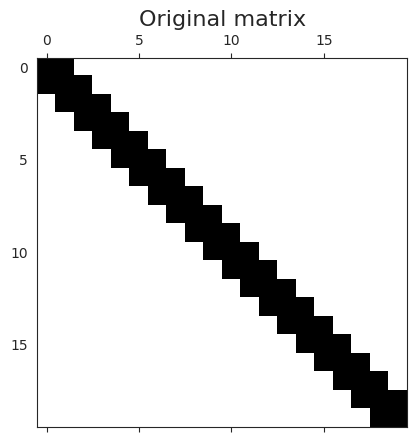

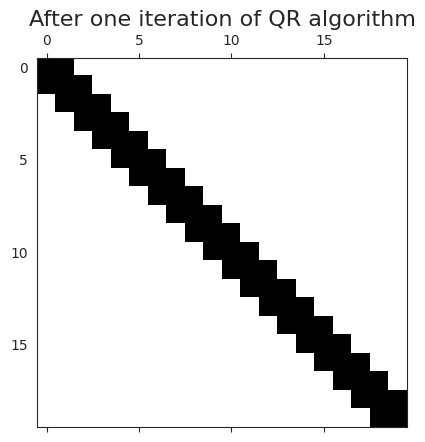

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

#Generate a random tridiagonal matrix
n = 20
d = np.random.randn(n)
sub_diag = np.random.randn(n-1)

mat = np.diag(d) + np.diag(sub_diag, -1) + np.diag(sub_diag, 1)
plt.spy(mat)
plt.title("Original matrix", fontsize=16)
q, r = np.linalg.qr(mat)
plt.figure()
b = r.dot(q)
b[abs(b) <= 1e-12] = 0
plt.spy(b)
plt.title("After one iteration of QR algorithm", fontsize=16)
#plt.figure()
#plt.imshow(np.abs(r.dot(q)))
b[0, :]

Трёхдиагональная форма


- Работая с трёхдиагональной формой, вам не нужно вычислять матрицу $Q$ : нужно лишь вычислить трёхдиагональную часть, которая получается после итерации

$$
A_k=Q_k R_k, \quad A_{k+1}=R_k Q_k
$$

в случае $A_k=A_k^*$
- Такая матрица определяется $\mathcal{O}(n)$ параметрами
- Вычисление QR разложения более сложное, но возможно вычислить $A_{k+1}$ напрямую без вычисления $Q_k$.
- Это называется неявный QR-шаr.


Теорема о неявном QR алгоритме

- Bce реализации неявного QR алгоритма основаны на следующей теореме

__Теорема__. 

Пусть

$$
Q^* A Q=H
$$

верхне-гессенбергова форма матрицы. Тогда первый столбец матрицы $Q$ определяет все остальные её столбцы. Он может быть найден из следующего уравнения

$$
A Q=Q H
$$  

## QR со сдвигами, степенной метод, итерации Рэлея и обратные итерации, SVD

### Сходимость QR алгоритма

- Сходимость QR алгоритма - непростой вопрос (см. Е.Е. Тыртышников "Краткий курс численного анализа")!
Итог. Если у нас есть разложение вида

$$
A=X \Lambda X^{-1}, \quad A=\left[\begin{array}{ll}
A_{11} & A_{12} \\
A_{21} & A_{22}
\end{array}\right]
$$

и

$$
\Lambda=\left[\begin{array}{cc}
\Lambda_1 & 0 \\
0 & \Lambda_2
\end{array}\right], \quad \lambda\left(\Lambda_1\right)=\left\{\lambda_1, \ldots, \lambda_m\right\}, \lambda\left(\Lambda_2\right)=\left\{\lambda_{m+1}, \ldots, \lambda_r\right\}
$$

а также есть зазор между собственными значениями в матрице $\Lambda_1$ и $\Lambda_2\left(\left|\lambda_1\right| \geq \cdots \geq\left|\lambda_m\right|>\left|\lambda_{m+1}\right| \geq \cdots \geq\left|\lambda_r\right|>0\right)$, тогда блок $A_{21}^{(k)}$ матрицы $A_k$ сходится к нулевому в процессе работы QR алгоритма со скоростью

$$
\left\|A_{21}^{(k)}\right\| \leq C q^k, \quad q=\left|\frac{\lambda_{m+1}}{\lambda_m}\right|,
$$

где $m$ размер матрицы $\Lambda_1$

Таким образом, нам нужно увеличить зазор между $\Lambda_1$ и $\Lambda_2$. Это можно сделать с помощью QR алгоритма со сдвигами.

### QR алгоритм со сдвигами

$$
A_k-s_k I=Q_k R_k, \quad A_{k+1}=R_k Q_k+s_k I
$$

- Сходимость такого алгоритма линейная с фактором

$$
\left|\frac{\lambda_{m+1}-s_k}{\lambda_m-s_k}\right|
$$

где $\lambda_m-m$-ое большее по модулю собственное значение. Если сдвиг близок к собственному вектору, сходимость более быстрая.

- Существуют различные стратегии выбора сдвигов.
- Использование сдвигов - это общий подход к ускорению сходимости итерационных методов вычисления собственных значений. Далее покажем, как выбирать сдвиги для более простых алгоритмов

### Сдвиги и степенной метод

Напоминаем, что такое степенной метод для вычисления собственых значений.

$$
x_{k+1}:=A x_k, \quad x_{k+1}:=\frac{x_{k+1}}{\left\|x_{k+1}\right\|} .
$$

- Он сходится к собственному вектору, соответствующему максимальному по модулю собственному значению.
- Сходимость может быть очень медленной.
- Используем сдвиги: если мы преобразуем матрицу

$$
A:=A-\lambda_k I,
$$

то соответствующее собственное значение уменьшится (а нам нужно максимальное по модулю). Это не то, что нам было нужно!

### Обратная итерация и итерация Релея

- Для того чтобы из малого собственного значения сделать большое, нам нужно обратить матрицу, и это приводит нас к методу обратной итерации

$$
x_{k+1}=(A-\lambda I)^{-1} x_k,
$$

где $\lambda$ - сдвиг, который близок к собственному значению, которое мы хотим найти. Аналогично степенному методу сходимость линейная.
- Для ускорения сходимости можно использовать итерацию Релея, которая задаётся с помощью адаптивного выбора параметра сдвига:

$$
\begin{aligned}
x_{k+1} &=\left(A-\lambda_k I\right)^{-1} x_k, \\
\lambda_k &=\frac{\left(A x_k, x_k\right)}{\left(x_k, x_k\right)}
\end{aligned}
$$

В симметричном случае $A=A^*$ сходимость локально кубическая, и локально квадратичная иначе.

### Сингулярные значения и собственные значения

- Сингулярное разложение имеет вид

$$
A=U \Sigma V^*
$$

и существует для любой матрицы.

- Его также можно считать способом приведения данной матрицы к диагональному виду с помощью двух унитарных преобразований:

$$
\Sigma=U^* A V .
$$

- С помощью двусторонних преобразований Хаусхолдера мы можем привести любую матрицу к бидиагональной форме $B$.

Неявный QR алгоритм (со сдвигами) вычисляет собственные значения. Но мы не можем применить его напрямую к бидиагональной матрице, поскольку она может быть недиагонализуема в общем случае.
Однако задачу вычисления сингулярного разложения можно свести к симметричной задаче на собственные значения двумя способами:

1. Работать с трёхдиагональной матрицей

$$
T=B^* B
$$

2. Работать с расширенной матрицей

$$
T=\left[\begin{array}{cc}
0 & B \\
B^* & 0
\end{array}\right]
$$

Случай 1 практически реализуем, если не формировать матрицу $T$ явно!

Таким образом, задача вычисления сингулярных чисел может быть сведена к задаче вычисления собственных чисел симметричной трёхдиагональной матрицы.

## Метод "разделяй и властвуй"

Пусть у нас есть трёхдиагональная матрица и мы разделили её на блоки:

$$
T=\left[\begin{array}{cc}
T_1^{\prime} & B \\
B^{\top} & T_2^{\prime}
\end{array}\right]
$$

Можем записать матрицу $T$ в виде

$$
T=\left[\begin{array}{cc}
T_1 & 0 \\
0 & T_2
\end{array}\right]+b_m v v^*
$$

где $v v^*$ - матрица ранга $1, v=(0, \ldots, 0,1,1,0, \ldots, 0)^T$.

Пусть мы уже разложили матрицы $T_1$ и $T_2$ :

$$
T_1=Q_1 \Lambda_1 Q_1^*, \quad T_2=Q_2 \Lambda_2 Q_2^*
$$

Тогда (проверьте!),

$$
\left[\begin{array}{cc}
Q_1^* & 0 \\
0 & Q_2^*
\end{array}\right] T\left[\begin{array}{cc}
Q_1 & 0 \\
0 & Q_2
\end{array}\right]=D+\rho u u^*, \quad D=\left[\begin{array}{cc}
\Lambda_1 & 0 \\
0 & \Lambda_2
\end{array}\right]
$$

то есть мы свели задачу к задаче вычисления собственных значений у матрицы вида
диагональная матрица плюс матрица малого ранга. Решение задачи изложено в теории в  семинарских задачах   10 - 13.

## Метод бисекции

- Абсолютно другой подход основан на идеи бисекции
- Дана матрица $A$, инерция которой определяется как триплет $(\nu, \zeta, \pi)$, где $\nu$ - число отрицательных, $\zeta$ - число нулевых, и $\pi$ - число положительных собственных значений.
- Если $X$ невырождена, тогда
$\operatorname{Inertia}(A)=\operatorname{Inertia}\left(X^* A X\right)$

**Бисекция с помощью метода Гаусса**


- Для данного z мы можем запустить метод Гаусса и получить разложение:

$$
A-z I=L D L^*
$$

а инерция для диагональной матрицы вычисляется просто.

- С помощью инерции мы можем легко посчитать число собственных значений в заданном интервале.
- __Пример__: если $\operatorname{Inertia}(A)=(5,0,2)$ и после сдвига $\operatorname{Inertia}(A-z I)=(4,0,3), z \in[a, b]$ тогда это значит, что $\lambda(A) \in[a, z]$.

## Метод Якоби

- Вспомним что такое вращения Гивенса (Якоби):
на плоскости им соответствуют ортогональные матрицы вида

$$
\left(\begin{array}{cc}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{array}\right)
$$

а в $n$-мерном пространстве мы выбираем два индекса і и ји вращаем относительно соответствующих элементов $n$-мерного вектора.

- Идея метода Якоби состоит в минимизации суммы квадратов недиагональных элементов:

$$
\Gamma(A)=\operatorname{off}\left(U^{*} A U\right), \quad \text { off }^{2}(X)=\sum_{i \neq j}\left|X_{i j}\right|^{2}=\|X\|_{F}^{2}-\sum_{i=1}^{n} x_{i i}^{2}
$$

с помощью последовательных вращений Якоби для их зануления.
- Когда элементы выбраны, их легко занулить.
- Главный вопрос: в каком порядке нужно проводить зануление?
- Если мы всегда зануляем максимальный недиагональный элемент, метод имеет глобально линейную сходимость и локально квадратичную.
- На практике используется циклический порядок $\text { (то есть, }(1,2),(1,3), \ldots,(2,3), \ldots) $

Метод Якоби был первым численным методом для вычисления собственных значений, предложен в 1846. Преимущества:

- Большая константа в оценке сложности

- Очень точный (высокая относительная точность для малых собственных значений по сравнению с другими методами)

- Хорошая возможность параллелизации 
